In [1]:
data_file = open("mnist_dataset/mnist_train_100.csv", "r")
data_list = data_file.readlines()
data_file.close()

In [2]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [3]:
import matplotlib.pyplot as plt
import numpy

In [4]:
#,로 구분도니 픽셀값 리스트 변환
all_values = data_list[0].split(',')

In [5]:
#픽셀값 리스트를 28x28 배열로 변환
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))

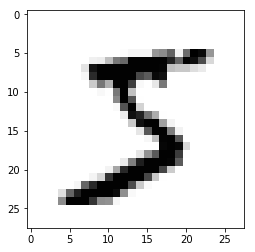

In [6]:
plt.imshow(image_array, cmap='Greys', interpolation = 'None')

In [7]:
scaled_input = (numpy.asfarray(all_values[1:])/255.0*0.99)+ 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [8]:
#정답 레이블 - 정답이 4인 경우
onodes = 10 #output node
targets = numpy.zeros(onodes) + 0.01 #0값 피가히 위해 더하기
targets[int(all_values[0])] = 0.99 #4에 0.99 배정
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


In [9]:
from neuralNetwork import neuralNetwork

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.5

n=neuralNetwork(input_nodes, hidden_nodes, output_nodes,learning_rate)

In [10]:
## 신경망 학습시키기
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [ ]:
#테스트 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
    # 레코드를 쉼표로 구분
    all_values = record.split(',')
    # 입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99) + 0.01
    # 결과 값 생성(정답은 0.99, 그 외는 모두 0.01)
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    # 학습 데이터로 신경망 훈련시키기
    n.train(inputs, targets)

In [ ]:
## 신경망 테스트하기
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

# 성적표(정답률)를 위한 테스트
scorecard = []

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
    # 레코드를 쉼표로 구분
    all_values = record.split(',')
    # 정답은 첫번째 값
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치해야 함
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    # 정답 여부 판단
    if(label == correct_label):
        # 정답인 경우 성적표에 1을 추가
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 추가
        scorecard.append(0)
            
#print(scorecard)
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

In [ ]:
from neuralNetwork import neuralNetwork
import pandas as pd
import numpy as np

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.5

n=neuralNetwork(input_nodes, hidden_nodes, output_nodes,learning_rate)



In [ ]:
data_frame= pd.read_csv("mnist_dataset/mnist_train_10.csv", header=None)
test_values = data_frame.values
test_labels = train_values[:,0:1]
test_data = train_values[:,1:]/255.0*0.99 + 0.01
scorecard = []

for correct_label, inputs in zip(test_labels, test_data):
    outputs = n.query(inputs)
    
    label = np.argmax(outputs)
    # 정답 여부 판단
    if(label == correct_label):
        # 정답인 경우 성적표에 1을 추가
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 추가
        scorecard.append(0)
        
#print(scorecard)
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

In [1]:
from neuralNetwork import neuralNetwork
import pandas as pd
import numpy as np

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.5




In [2]:
#신경망 인스턴스 생성
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes,learning_rate)

#가중치만 저장시켜 따로 train
n.train_from_file("mnist_dataset/mnist_train_100.csv")
n.save_weight("./mnist")


In [3]:
#신경망 인스턴스 생성
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate, "./mnist")

performance = n.query_from_file("mnist_dataset/mnist_test_10.csv")
print("performance = ", performance)

performance =  0.2


In [4]:
pd.read_csv('./mnist_who.csv')

,-0.33644710092114893,0.4265121358169459,-0.39685164123534283,-0.46389375117350906,-0.04957398962246584,0.1810502502577417,-0.22576611223643392,0.23334120069649353,0.1896498860082302,-0.38565796083398535,...,0.09059649709865747,0.6084554306421807,-0.4300698429173012,0.061925578126001225,-0.023092361578366007,0.11735830853580309,-0.2816757737282879,0.3143226881966379,-0.5905948963432741,0.2214560275503743
0,0.024349,-0.514921,-0.348270,0.009785,0.110092,-0.089011,0.075573,-0.164924,0.247856,0.127558,...,0.183979,0.121327,-0.361829,0.393390,0.340397,-0.335209,0.064003,-0.014926,-0.011063,0.266982
1,-0.052235,-0.191241,0.174570,-0.340698,-0.220879,0.463821,-0.059942,0.210930,-0.239885,-0.787075,...,-0.128189,-0.183897,0.109101,-0.390402,0.047316,0.073392,0.221989,0.230640,-0.251071,-0.657793
2,0.490482,0.039256,-0.101878,-0.605311,0.869295,0.245995,-0.148609,-0.051777,-0.292872,-0.488344,...,0.195087,0.168352,-0.228774,-0.369366,0.136995,0.486927,-0.069900,0.025495,-0.160401,-0.210305
3,-0.060150,0.012692,0.084845,-0.183077,-0.035408,-0.060933,0.371147,-0.009417,0.006658,0.528899,...,0.939511,0.152490,0.355365,0.221677,-0.388453,0.143238,-0.368682,0.129421,0.034269,0.143263
4,-0.026716,-0.261326,-0.285190,-0.002491,0.069826,0.249158,-0.420320,-0.186399,0.276298,-0.081505,...,0.160290,-0.293962,-0.066742,0.110797,0.064096,0.078250,0.093338,-0.463997,-0.031298,-1.133434
5,0.228275,-0.033113,-0.180014,0.002579,-0.199551,-0.670388,0.046174,-0.107037,0.356603,-0.207742,...,-0.374766,0.005968,0.618764,-0.487674,0.171769,0.584015,0.666411,-0.050719,-0.060241,-0.122596
6,-0.238927,-0.443348,-0.381746,-0.602968,-0.155797,0.198055,0.314655,-0.348473,0.145850,-0.066052,...,0.020332,0.035329,-0.284323,0.038816,-0.212276,0.140903,-0.141605,0.067665,-0.442802,-1.026210
7,0.218450,0.464753,-0.459913,-0.101076,-0.262133,-0.109853,-0.146778,0.418017,-0.194383,-0.408745,...,0.553949,0.202220,-0.241140,-0.248091,-0.230300,-0.065659,0.090600,-0.049685,-0.146930,-0.263091
8,-0.504657,0.182902,-0.115229,0.051876,-0.136252,0.085285,-0.056658,-0.210442,0.354613,-0.004027,...,-0.010434,-0.298628,-0.331486,-0.262867,-0.167438,-0.739875,0.413617,-0.294857,-0.539614,-0.404219
